#### Uebungsblatt 1

### import libraries

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('crime.csv', encoding='latin-1')
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319073 entries, 0 to 319072
Data columns (total 17 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   INCIDENT_NUMBER      319073 non-null  object 
 1   OFFENSE_CODE         319073 non-null  int64  
 2   OFFENSE_CODE_GROUP   319073 non-null  object 
 3   OFFENSE_DESCRIPTION  319073 non-null  object 
 4   DISTRICT             317308 non-null  object 
 5   REPORTING_AREA       319073 non-null  object 
 6   SHOOTING             1019 non-null    object 
 7   OCCURRED_ON_DATE     319073 non-null  object 
 8   YEAR                 319073 non-null  int64  
 9   MONTH                319073 non-null  int64  
 10  DAY_OF_WEEK          319073 non-null  object 
 11  HOUR                 319073 non-null  int64  
 12  UCR_PART             318983 non-null  object 
 13  STREET               308202 non-null  object 
 14  Lat                  299074 non-null  float64
 15  Long             

# Wie hat sich die Gesamtanzahl der Straftaten im Laufe der Jahre entwickelt?

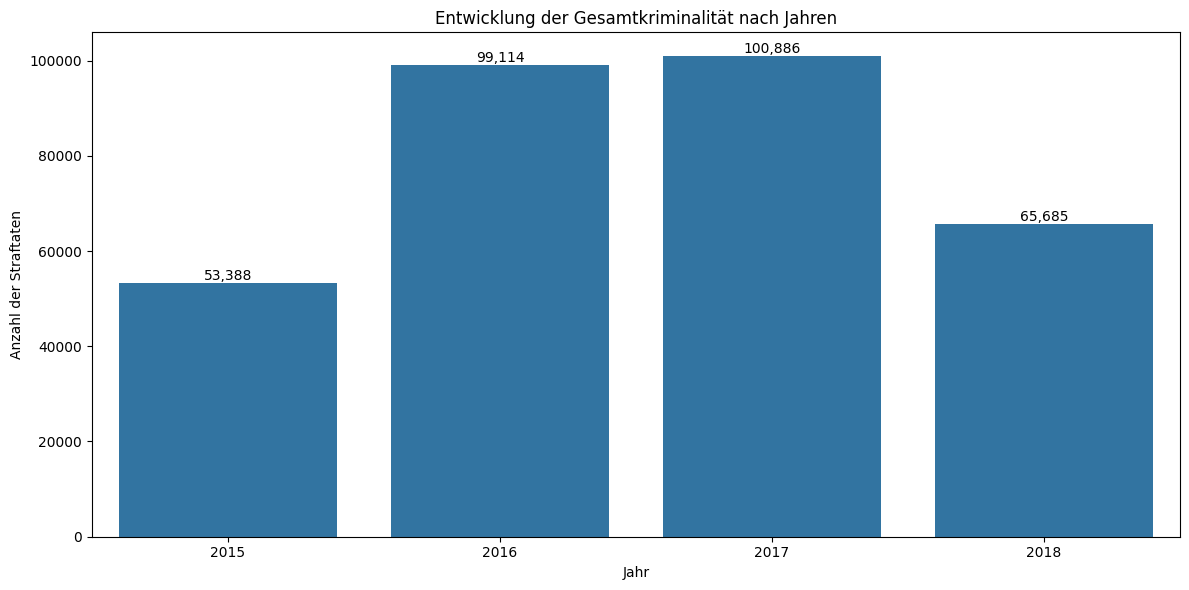


Jährliche Veränderung der Gesamtkriminalität:
2016: +85.6%
2017: +1.8%
2018: -34.9%


In [18]:
# 1. Gesamtkriminalität nach Jahren
plt.figure(figsize=(12, 6))
yearly_crimes = df.groupby('YEAR').size()
ax = sns.barplot(x=yearly_crimes.index, y=yearly_crimes.values)

plt.title('Entwicklung der Gesamtkriminalität nach Jahren')
plt.xlabel('Jahr')
plt.ylabel('Anzahl der Straftaten')

# add number labels
for i, v in enumerate(yearly_crimes):
    ax.text(i, v, f'{v:,}', ha='center', va='bottom')

plt.tight_layout()
plt.show()

# calculate yearly change
yearly_change = yearly_crimes.pct_change() * 100
print("\nJährliche Veränderung der Gesamtkriminalität:")
for year, change in yearly_change.items():
    if not pd.isna(change):
        print(f"{year}: {change:+.1f}%")


#### 1.1 Welche Straftaten sind am häufigsten?

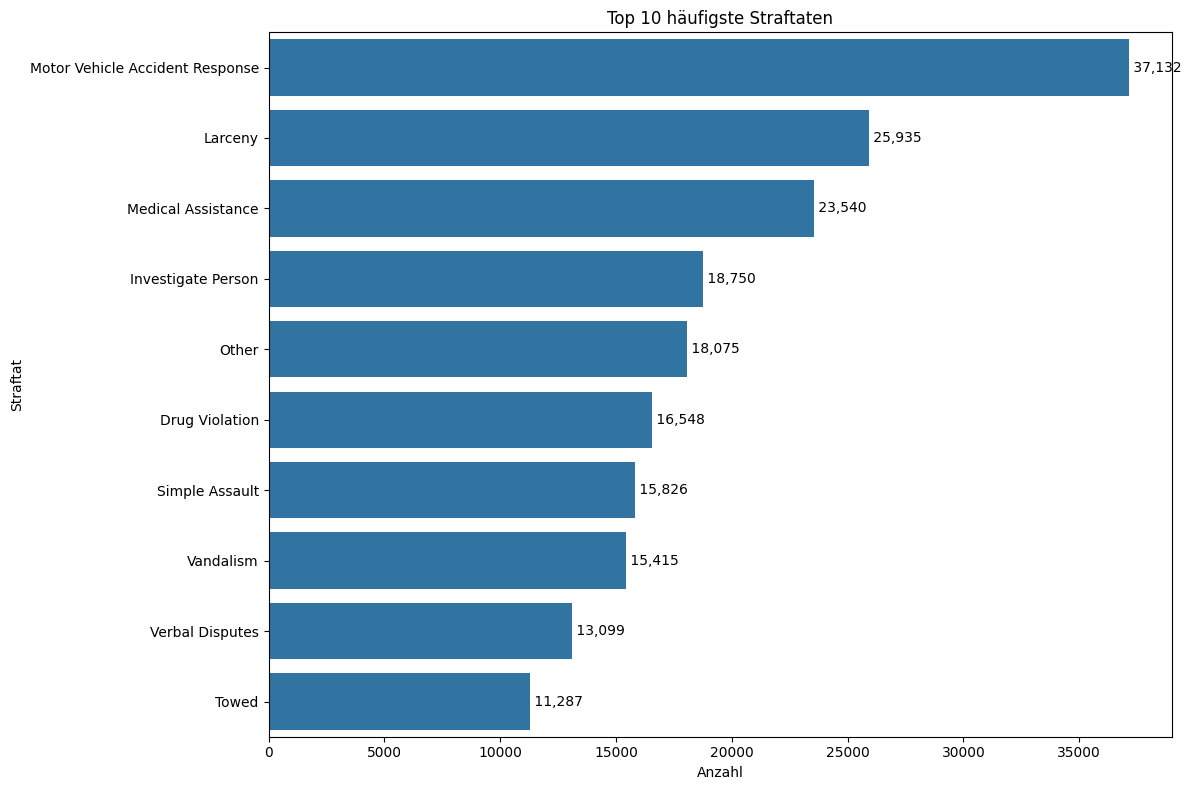


Top 10 häufigste Straftaten: OFFENSE_CODE_GROUP
Motor Vehicle Accident Response    37132
Larceny                            25935
Medical Assistance                 23540
Investigate Person                 18750
Other                              18075
Drug Violation                     16548
Simple Assault                     15826
Vandalism                          15415
Verbal Disputes                    13099
Towed                              11287
Name: count, dtype: int64


In [36]:
# 1.1 Am häufigsten vorkommende Straftaten
plt.figure(figsize=(12, 8))
top_crimes = df['OFFENSE_CODE_GROUP'].value_counts().head(10)
ax = sns.barplot(x=top_crimes.values, y=top_crimes.index)

plt.title('Top 10 häufigste Straftaten')
plt.xlabel('Anzahl')
plt.ylabel('Straftat')

# Nummerierung der Balken
for i, v in enumerate(top_crimes):
    ax.text(v, i, f' {v:,}', va='center')

plt.tight_layout()
plt.show()

print("\nTop 10 häufigste Straftaten:", top_crimes)


#### 1.2 Wie hat sich die Zahl der schweren Straftaten im Laufe der Jahre entwickelt?

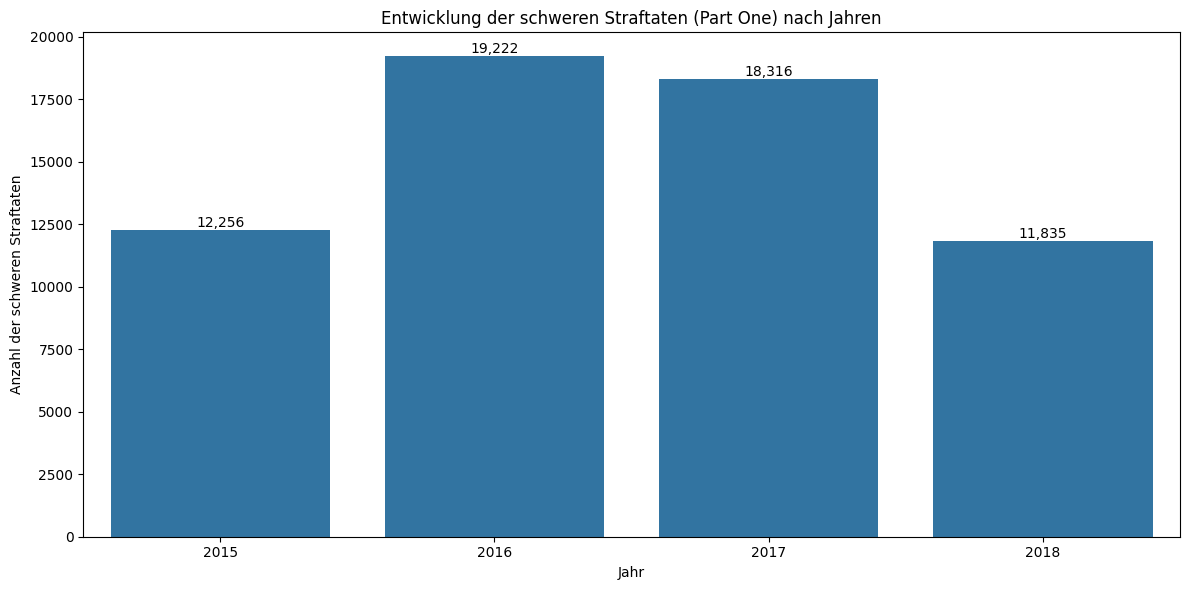

In [37]:
# 1.2 Entwicklung der schweren Straftaten (Part One) nach Jahren
part_one_crimes = df[df['UCR_PART'] == 'Part One']
plt.figure(figsize=(12, 6))
yearly_serious_crimes = part_one_crimes.groupby('YEAR').size()
ax = sns.barplot(x=yearly_serious_crimes.index, y=yearly_serious_crimes.values)

plt.title('Entwicklung der schweren Straftaten (Part One) nach Jahren')
plt.xlabel('Jahr')
plt.ylabel('Anzahl der schweren Straftaten')

# Nummerierung der Balken
for i, v in enumerate(yearly_serious_crimes):
    ax.text(i, v, f'{v:,}', ha='center', va='bottom')

plt.tight_layout()
plt.show()

#### 1.4 Warum ist die Gesamtzahl 2015 und 2018 (so) niedrig?

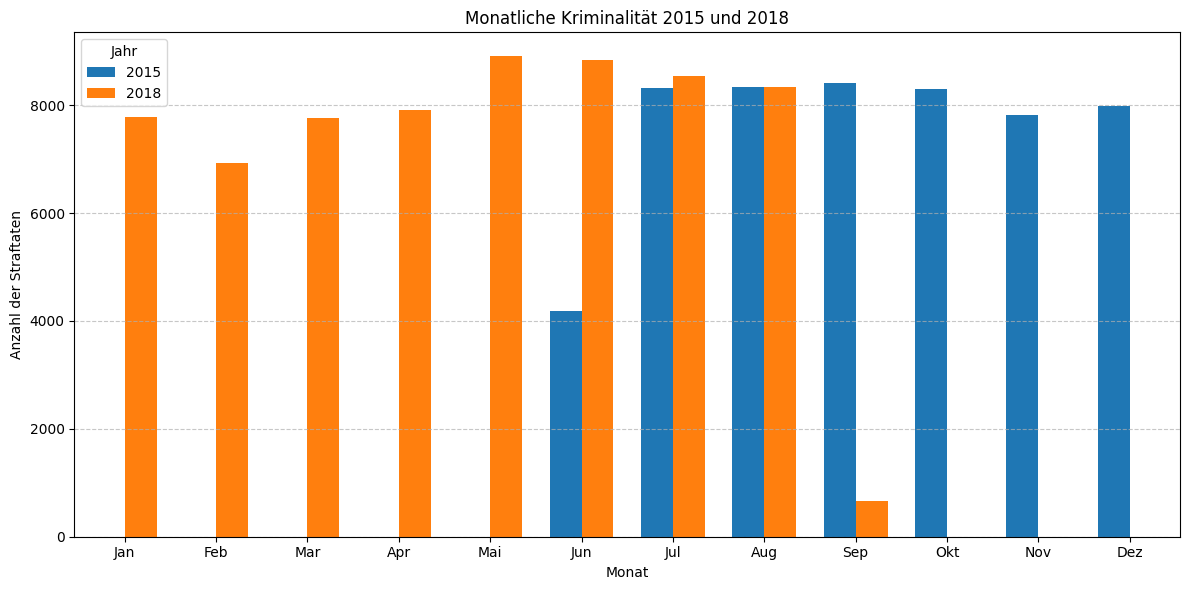

Grund:  
 In 2015 fehlen Daten für den Monaten Jan bis Mai. 
 In 2018 fehlen Daten für den Monaten von Oktober bis Dezember.


In [40]:
# 1.4 Monatliche Kriminalität 2015 und 2018
plt.figure(figsize=(12, 6))

monthly_crimes_2015_2018 = df[df['YEAR'].isin([2015,2018])].groupby(['YEAR', 'MONTH']).size().unstack()

x = np.arange(len(monthly_crimes_2015_2018.columns)) 
bar_width = 0.35
years = monthly_crimes_2015_2018.index

# years
plt.bar(x - bar_width/2, monthly_crimes_2015_2018.iloc[0], bar_width, label=str(years[0]))
plt.bar(x + bar_width/2, monthly_crimes_2015_2018.iloc[1], bar_width, label=str(years[1]))

plt.title('Monatliche Kriminalität 2015 und 2018')
plt.xlabel('Monat')
plt.ylabel('Anzahl der Straftaten')
month_labels = ['Jan', 'Feb', 'Mar', 'Apr', 'Mai', 'Jun',
                'Jul', 'Aug', 'Sep', 'Okt', 'Nov', 'Dez']
plt.xticks(x, month_labels)
plt.legend(title='Jahr')
plt.grid(True, axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

print("Grund:  \n In 2015 fehlen Daten für den Monaten Jan bis Mai. \n In 2018 fehlen Daten für den Monaten von Oktober bis Dezember.")

# In welchen Stadtgebieten werden, aufgeschlüsselt nach Jahr, die meisten Straftaten begangen?

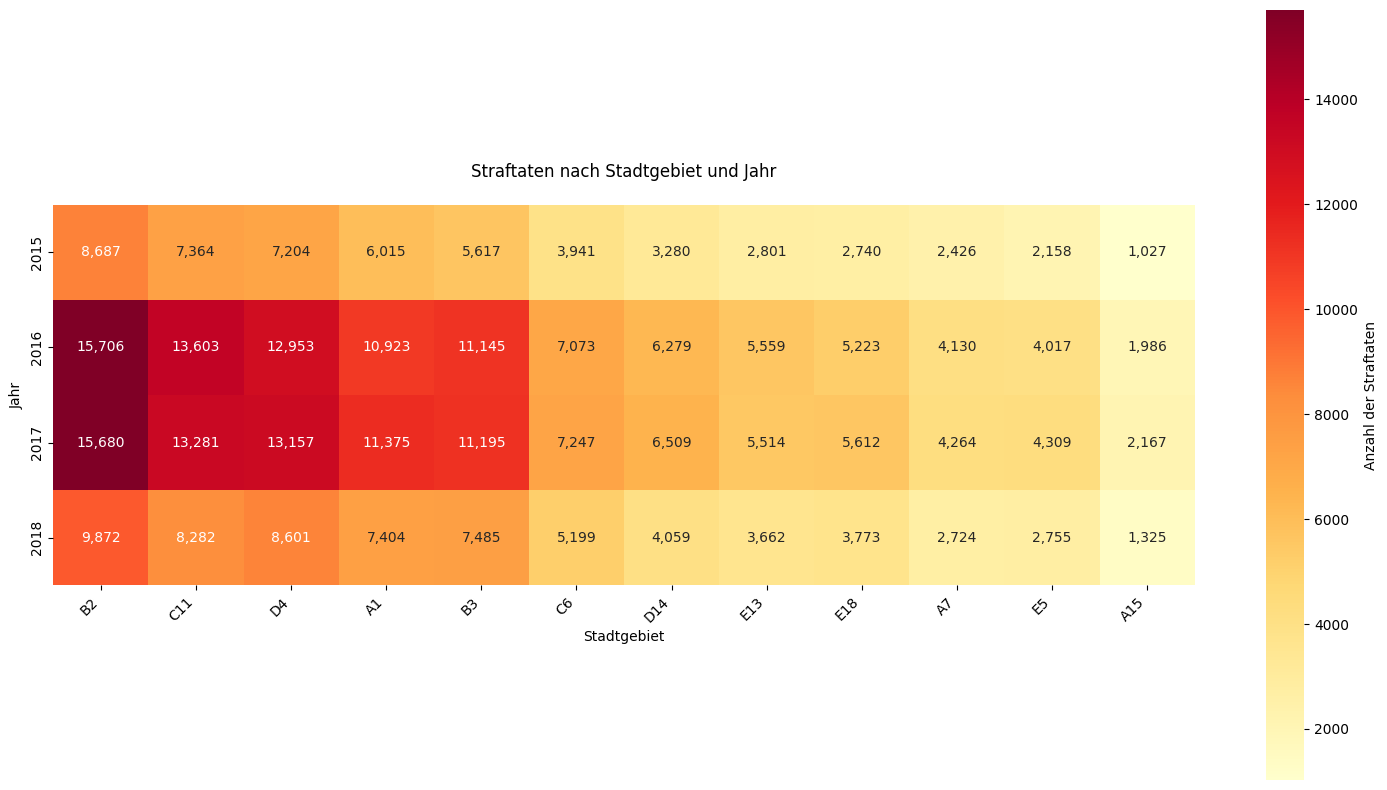


Gesamtanzahl der Straftaten nach Stadtgebiet:
B2: 49,945
C11: 42,530
D4: 41,915
A1: 35,717
B3: 35,442
C6: 23,460
D14: 20,127
E13: 17,536
E18: 17,348
A7: 13,544
E5: 13,239
A15: 6,505


In [46]:
# Nach Gesamtkriminalität sortierte Bezirke
district_totals = df.groupby('DISTRICT').size().sort_values(ascending=False)
sorted_districts = district_totals.index

# Kriminalität nach Jahr und Bezirk
crimes_by_district_year = df.groupby(['YEAR', 'DISTRICT']).size().unstack()

# Neuordnung der Spalten nach Gesamtkriminalität
crimes_by_district_year = crimes_by_district_year[sorted_districts]

# Erstelle Figure mit angepasster Größe
plt.figure(figsize=(15, 8))

# Erstelle Heatmap
sns.heatmap(crimes_by_district_year, 
           annot=True,           # Zeige Werte in den Zellen
           fmt=',d',            # Zahlenformat mit Tausendertrennzeichen
           cmap='YlOrRd',       # Gelb-Rot Farbschema
           cbar_kws={'label': 'Anzahl der Straftaten'},
           square=True)         # Quadratische Zellen

# Setze Titel und Beschriftungen
plt.title('Straftaten nach Stadtgebiet und Jahr', pad=20)
plt.xlabel('Stadtgebiet')
plt.ylabel('Jahr')

# Rotiere x-Achsen Beschriftungen für bessere Lesbarkeit
plt.xticks(rotation=45, ha='right')

# Optimiere Layout
plt.tight_layout()
plt.show()

# Drucke Gesamtkriminalität pro Bezirk
print("\nGesamtanzahl der Straftaten nach Stadtgebiet:")
print("=" * 50)
for district in sorted_districts:
   total = district_totals[district]
   print(f"{district}: {total:,}")

#### 2.1 In welchen Stadtgebieten werden die meisten schweren Straftaten ('Part One') begangen? 

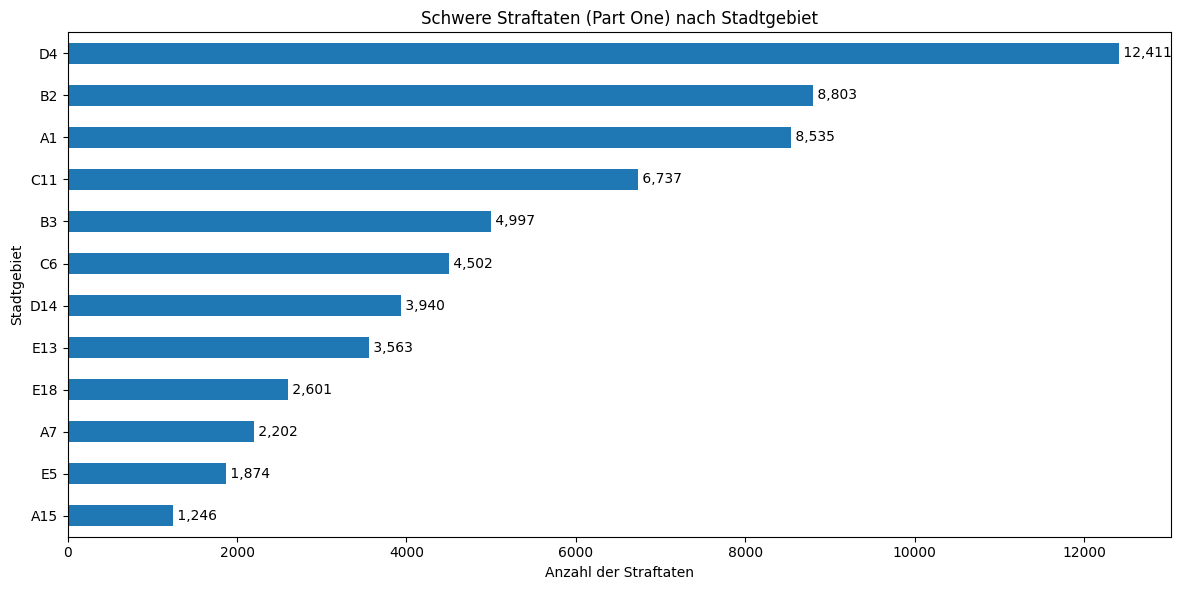

In [43]:
plt.figure(figsize=(12, 6))

# filter part one crimes and group by district
part_one_crimes = df[df['UCR_PART'] == 'Part One']
part_one_by_district = part_one_crimes.groupby('DISTRICT').size().sort_values(ascending=True)

# plot
ax = part_one_by_district.plot(kind='barh')

plt.title('Schwere Straftaten (Part One) nach Stadtgebiet')
plt.xlabel('Anzahl der Straftaten')
plt.ylabel('Stadtgebiet')

# value labels
for i, v in enumerate(part_one_by_district):
    ax.text(v, i, f' {v:,}', va='center')

plt.tight_layout()
plt.show()

#### 2.2 Welche Arten von schweren Straftaten ('Part One') treten in dem Stadtgebiet 'B2' am häufigsten auf?

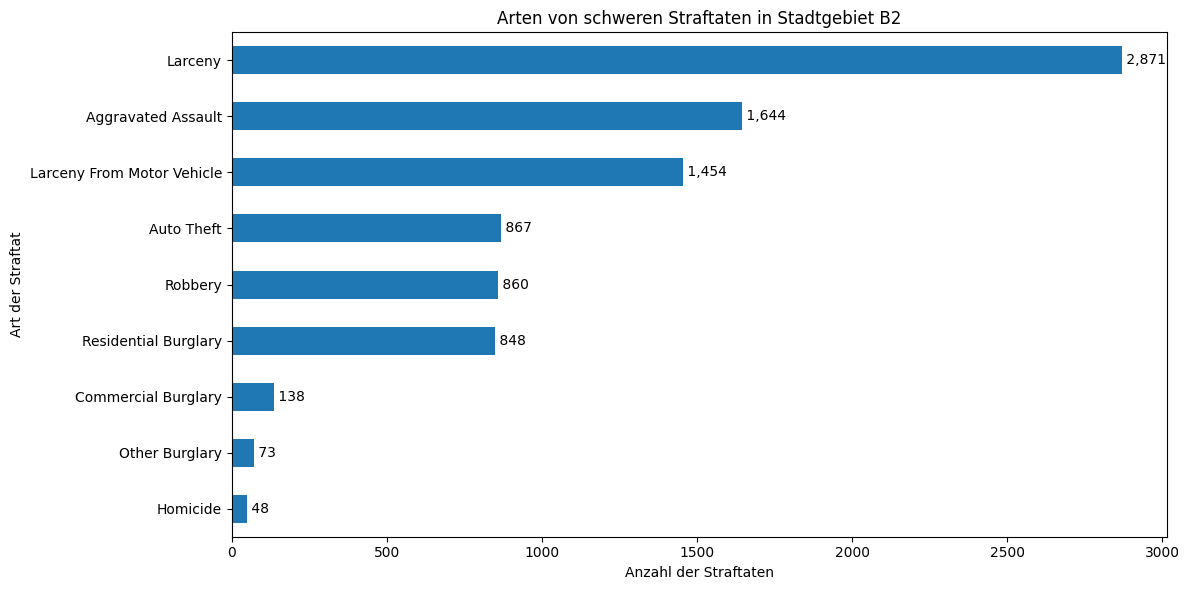


Top 10 häufigste schwere Straftaten in B2:
                            Anzahl
OFFENSE_CODE_GROUP                
Homicide                        48
Other Burglary                  73
Commercial Burglary            138
Residential Burglary           848
Robbery                        860
Auto Theft                     867
Larceny From Motor Vehicle    1454
Aggravated Assault            1644
Larceny                       2871


In [48]:
plt.figure(figsize=(12, 6))

# filter B2 district and group by UCR Part
b2_part_one = df[(df['DISTRICT'] == 'B2') & (df['UCR_PART'] == 'Part One')]
b2_crimes = b2_part_one.groupby('OFFENSE_CODE_GROUP').size().sort_values(ascending=True)

# plot
ax = b2_crimes.plot(kind='barh')

plt.title('Arten von schweren Straftaten in Stadtgebiet B2')
plt.xlabel('Anzahl der Straftaten')
plt.ylabel('Art der Straftat')

# value
for i, v in enumerate(b2_crimes):
    ax.text(v, i, f' {v:,}', va='center')

plt.tight_layout()
plt.show()


print("\nTop 10 häufigste schwere Straftaten in B2:")
print("=" * 50)
print(b2_crimes.tail(10).to_frame('Anzahl'))

# Existieren (a) Uhrzeiten, (b) Tage oder (c) Monate an denen mehr schwere Verbrechen ('Part One') stattfinden?

#### a) Uhrzeiten

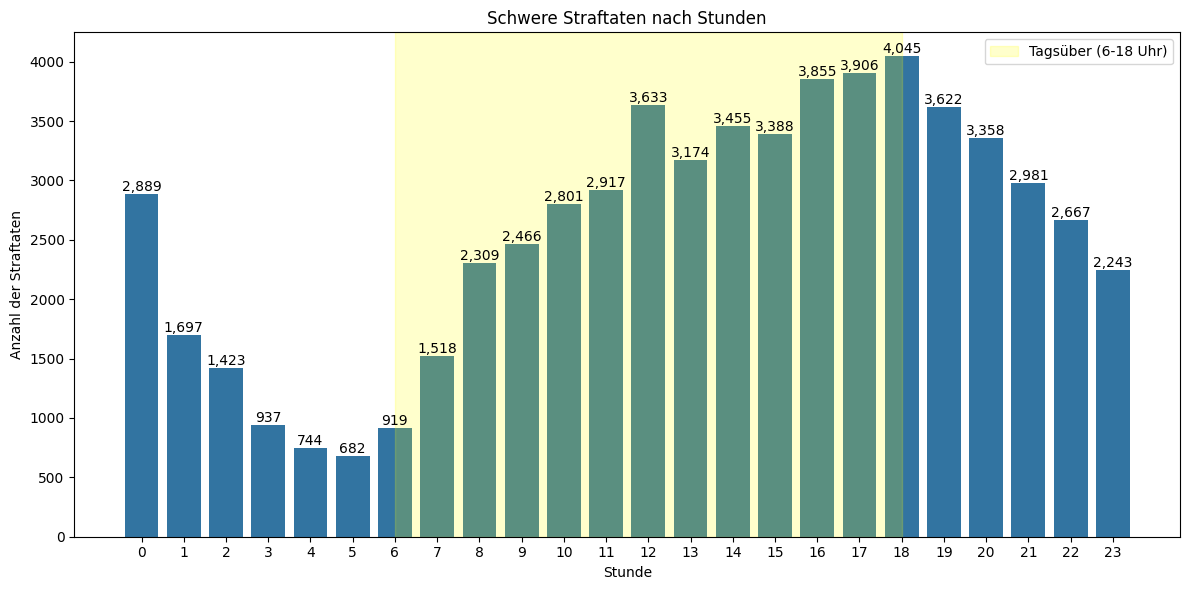


Verteilung Tag/Nacht:
Tagsüber (6-18 Uhr): 34,341 (55.7%)
Nachts (18-6 Uhr): 27,288 (44.3%)

Die Uhrzeiten, die meisten Straftaten verübt werden, sind zwischen 16 und 18 Uhr.


In [ ]:

# filter Part One crimes
part_one_crimes = df[df['UCR_PART'] == 'Part One']

# a) analyze by hour
plt.figure(figsize=(12, 6))
hourly_crimes = part_one_crimes.groupby('HOUR').size()
ax = sns.barplot(x=hourly_crimes.index, y=hourly_crimes.values)

# plot number labels
for i, v in enumerate(hourly_crimes.values):
    ax.text(i, v, f'{v:,}', ha='center', va='bottom')

plt.title('Schwere Straftaten nach Stunden')
plt.xlabel('Stunde')
plt.ylabel('Anzahl der Straftaten')

# add daytime/nighttime background
plt.axvspan(6, 18, alpha=0.2, color='yellow', label='Tagsüber (6-18 Uhr)')
plt.legend()
plt.tight_layout()
plt.show()

# calculate day/night distribution
day_crimes = part_one_crimes[(part_one_crimes['HOUR'] >= 6) & (part_one_crimes['HOUR'] < 18)].shape[0]
night_crimes = part_one_crimes[(part_one_crimes['HOUR'] < 6) | (part_one_crimes['HOUR'] >= 18)].shape[0]
print(f"\nVerteilung Tag/Nacht:")
print("=" * 50)
print(f"Tagsüber (6-18 Uhr): {day_crimes:,} ({day_crimes/len(part_one_crimes)*100:.1f}%)")
print(f"Nachts (18-6 Uhr): {night_crimes:,} ({night_crimes/len(part_one_crimes)*100:.1f}%)")

print(f"\nDie Uhrzeiten, die meisten Straftaten verübt werden, sind zwischen 16 und 18 Uhr.")


#### b) Tage

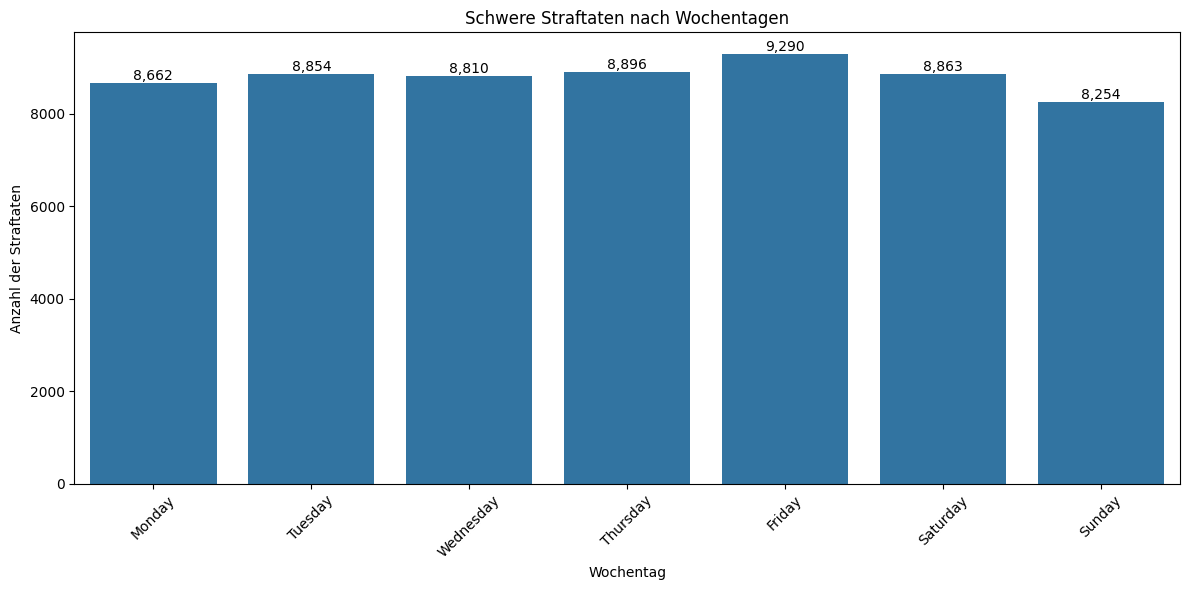

Freitag ist der Tag, an dem die meisten Straftaten verübt werden.


In [51]:

# b) analyze by day of week
plt.figure(figsize=(12, 6))
# sort by day of week
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
daily_crimes = part_one_crimes.groupby('DAY_OF_WEEK').size().reindex(day_order)
ax = sns.barplot(x=daily_crimes.index, y=daily_crimes.values)

# plot
for i, v in enumerate(daily_crimes.values):
    ax.text(i, v, f'{v:,}', ha='center', va='bottom')

plt.title('Schwere Straftaten nach Wochentagen')
plt.xlabel('Wochentag')
plt.ylabel('Anzahl der Straftaten')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

print("Freitag ist der Tag, an dem die meisten Straftaten verübt werden.")


#### c) Monate

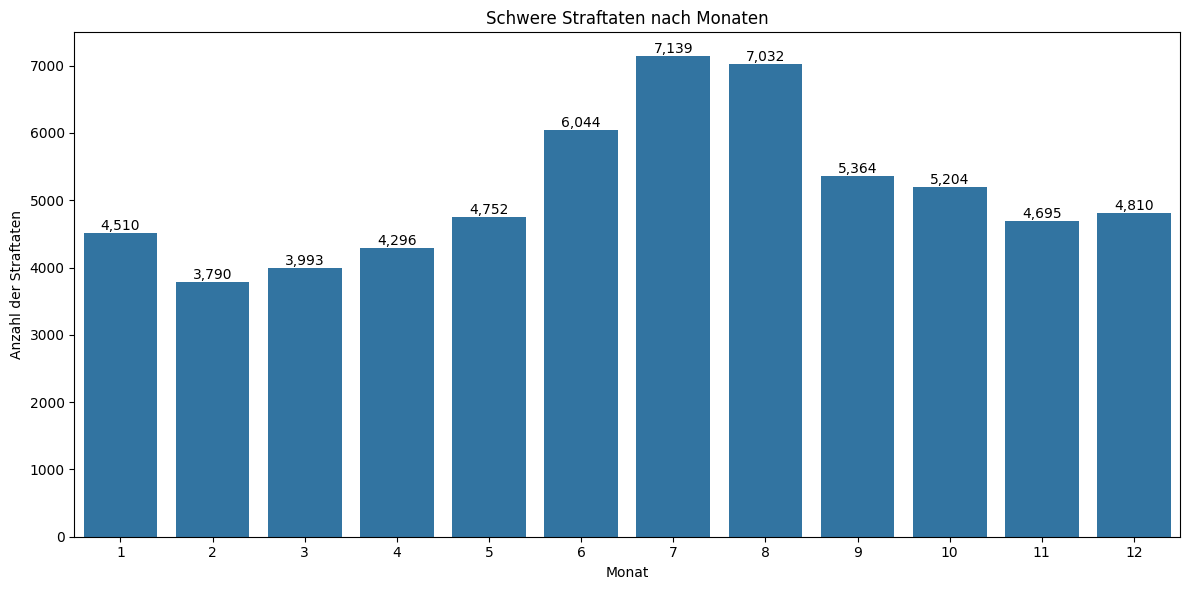


Schlüsselergebnisse:
Spitzenstunde: 18 Uhr (4,045 Straftaten)
Tag mit den meisten Straftaten: Friday (9,290 Straftaten)
Monat mit den meisten Straftaten: 7 (7,139 Straftaten)

Empfehlungen für Polizeieinsatz:
1.Haupteinsatzzeiten nach Uhrzeit:
   - 18:00 Uhr (4,045 Straftaten)
   - 17:00 Uhr (3,906 Straftaten)
   - 16:00 Uhr (3,855 Straftaten)
2.Haupteinsatzzeiten nach Tag:
DAY_OF_WEEK
Friday      9290
Thursday    8896
Saturday    8863
dtype: int64
3.Haupteinsatzzeiten nach Monat:
MONTH
7    7139
8    7032
6    6044
dtype: int64


In [53]:

# 3. analyze by month
plt.figure(figsize=(12, 6))
monthly_crimes = part_one_crimes.groupby('MONTH').size()
ax = sns.barplot(x=monthly_crimes.index, y=monthly_crimes.values)

# plot
for i, v in enumerate(monthly_crimes.values):
    ax.text(i, v, f'{v:,}', ha='center', va='bottom')

plt.title('Schwere Straftaten nach Monaten')
plt.xlabel('Monat')
plt.ylabel('Anzahl der Straftaten')
plt.tight_layout()
plt.show()

# output key results
print("\nSchlüsselergebnisse:")

# peak hour
peak_hour = hourly_crimes.idxmax()
print(f"Spitzenstunde: {peak_hour} Uhr ({hourly_crimes[peak_hour]:,} Straftaten)")

# the most dangerous day
peak_day = daily_crimes.idxmax()
print(f"Tag mit den meisten Straftaten: {peak_day} ({daily_crimes[peak_day]:,} Straftaten)")

# the most dangerous month
peak_month = monthly_crimes.idxmax()
print(f"Monat mit den meisten Straftaten: {peak_month} ({monthly_crimes[peak_month]:,} Straftaten)")

# recommendations Polizeieinsatz
print("\nEmpfehlungen für Polizeieinsatz:")
print("1.Haupteinsatzzeiten nach Uhrzeit:")
# top 3 hours with most crimes
top_hours = hourly_crimes.nlargest(3)
for hour, count in top_hours.items():
    print(f"   - {hour}:00 Uhr ({count:,} Straftaten)")
print("2.Haupteinsatzzeiten nach Tag:")
# top 3 days with most crimes
top_days = daily_crimes.nlargest(3)
print(top_days)
print("3.Haupteinsatzzeiten nach Monat:")
# top 3 months with most crimes
top_months = monthly_crimes.nlargest(3)
print(top_months)

# Welche leichten Straftaten ('Part Tree') benötigen (vermutlich) Verkehrspolizisten?


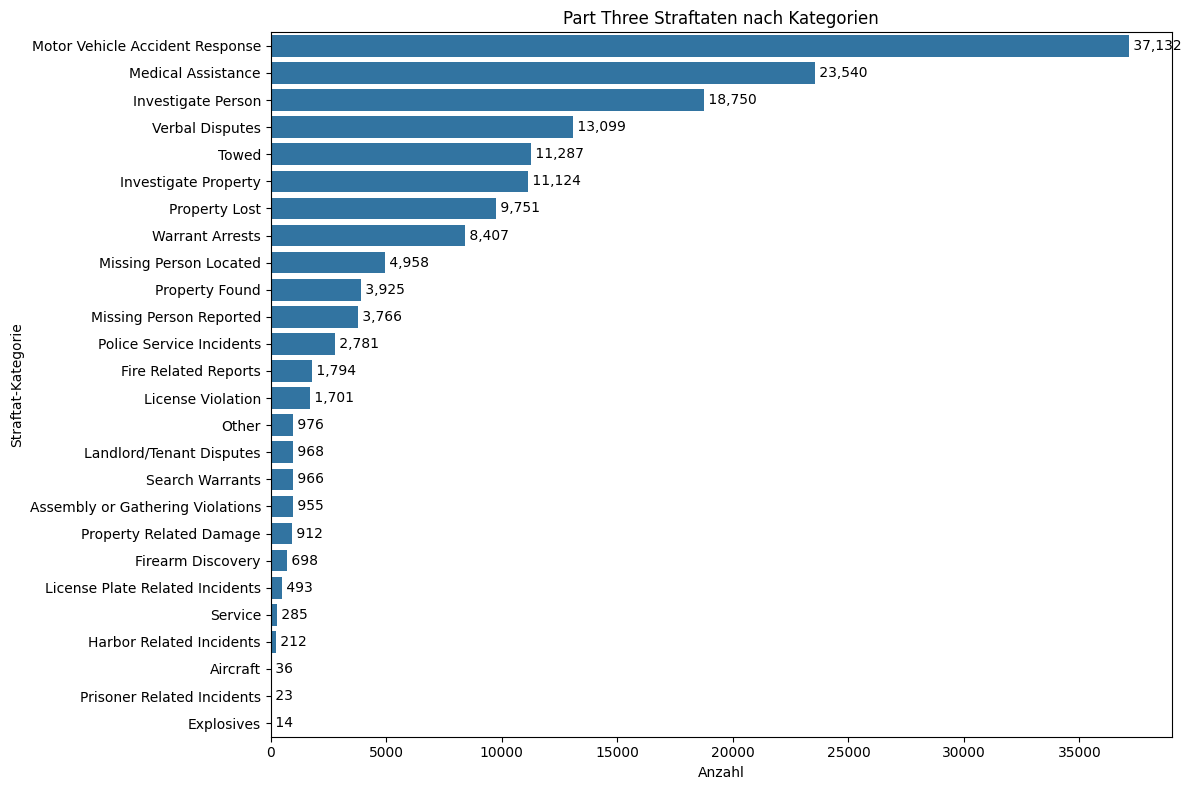

In [28]:

# 1. analyze Part Three crimes
part_three_crimes = df[df['UCR_PART'] == 'Part Three']

# calculate offense counts
offense_counts = part_three_crimes['OFFENSE_CODE_GROUP'].value_counts()

plt.figure(figsize=(12, 8))
ax = sns.barplot(x=offense_counts.values, y=offense_counts.index)

plt.title('Part Three Straftaten nach Kategorien')
plt.xlabel('Anzahl')
plt.ylabel('Straftat-Kategorie')

# plot
for i, v in enumerate(offense_counts):
    ax.text(v, i, f' {v:,}', va='center')

plt.tight_layout()
plt.show()


#### 4.2 Welches sind die 5 Straßen, in denen die meisten Verkehrspolizisten benötigt werden?


Verkehrsbezogene Straftaten und ihre Häufigkeit:
OFFENSE_CODE_GROUP
Motor Vehicle Accident Response    37132
Name: count, dtype: int64


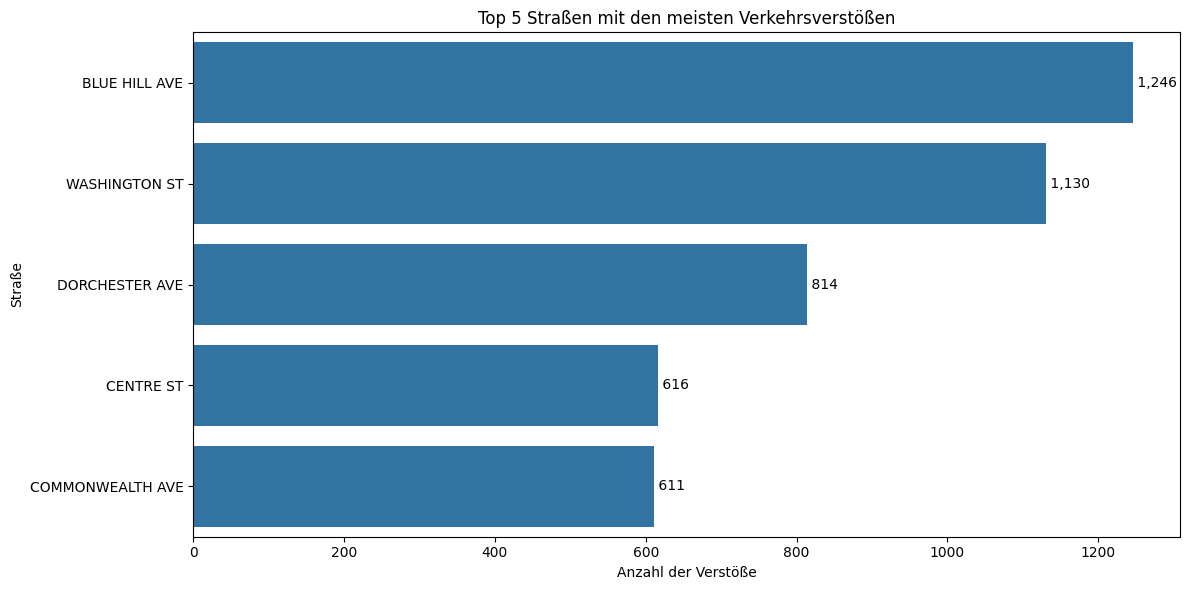


Detaillierte Analyse der Top 5 Straßen:

BLUE HILL AVE:
OFFENSE_CODE_GROUP
Motor Vehicle Accident Response    1246
Name: count, dtype: int64

WASHINGTON ST:
OFFENSE_CODE_GROUP
Motor Vehicle Accident Response    1130
Name: count, dtype: int64

DORCHESTER AVE:
OFFENSE_CODE_GROUP
Motor Vehicle Accident Response    814
Name: count, dtype: int64

CENTRE ST:
OFFENSE_CODE_GROUP
Motor Vehicle Accident Response    616
Name: count, dtype: int64

COMMONWEALTH AVE:
OFFENSE_CODE_GROUP
Motor Vehicle Accident Response    611
Name: count, dtype: int64


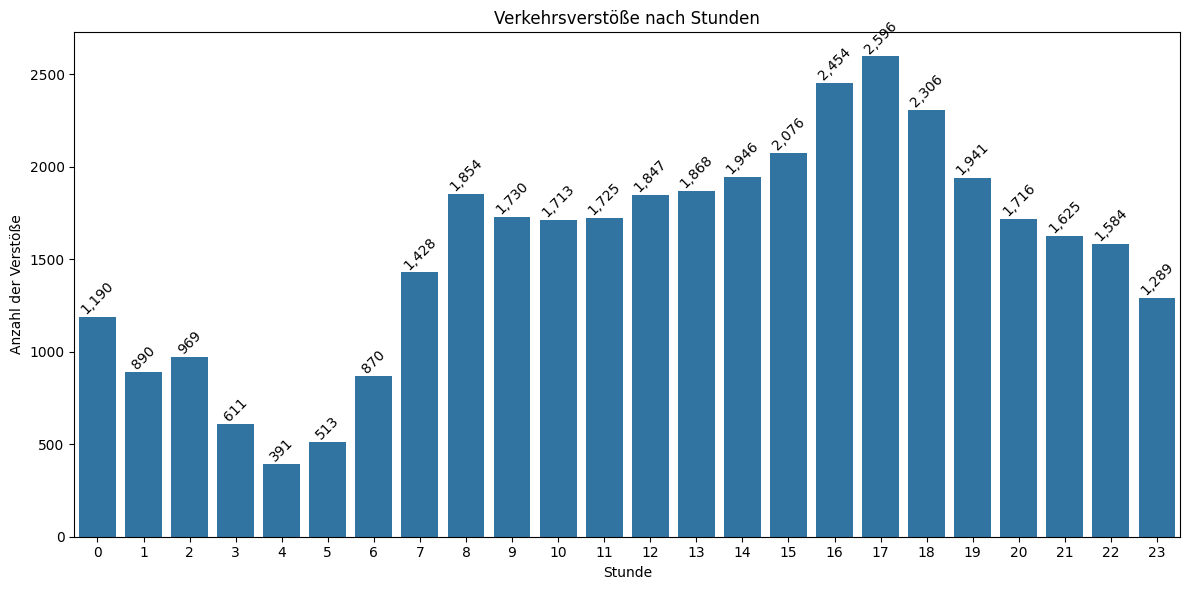


Zusammenfassung:
Gesamtzahl der Verkehrsverstöße: 37,132

Top 5 Straßen mit höchstem Bedarf an Verkehrspolizisten:
BLUE HILL AVE: 1,246 Verstöße
WASHINGTON ST: 1,130 Verstöße
DORCHESTER AVE: 814 Verstöße
CENTRE ST: 616 Verstöße
COMMONWEALTH AVE: 611 Verstöße

Hauptzeiten für Verkehrspolizeieinsätze:
17:00 Uhr: 2,596 Verstöße
16:00 Uhr: 2,454 Verstöße
18:00 Uhr: 2,306 Verstöße


In [29]:

# 2. filter traffic related offenses
traffic_keywords = ['TRAFFIC', 'VEHICLE', 'AUTO', 'PARKING', 'DRIVING', 'DUI']

def is_traffic_related(offense):
    return any(keyword in str(offense).upper() for keyword in traffic_keywords)

traffic_violations = part_three_crimes[
    part_three_crimes['OFFENSE_CODE_GROUP'].apply(is_traffic_related)
]

# print traffic related offenses
print("\nVerkehrsbezogene Straftaten und ihre Häufigkeit:")
traffic_type_counts = traffic_violations['OFFENSE_CODE_GROUP'].value_counts()
print(traffic_type_counts)

# 3. analyze 5 streets with most traffic violations
street_violations = traffic_violations.groupby('STREET').size().sort_values(ascending=False)
top_5_streets = street_violations.head(5)

plt.figure(figsize=(12, 6))
ax = sns.barplot(x=top_5_streets.values, y=top_5_streets.index)

plt.title('Top 5 Straßen mit den meisten Verkehrsverstößen')
plt.xlabel('Anzahl der Verstöße')
plt.ylabel('Straße')

# add number labels
for i, v in enumerate(top_5_streets):
    ax.text(v, i, f' {v:,}', va='center')

plt.tight_layout()
plt.show()

# 4. analyze traffic violations in detail
print("\nDetaillierte Analyse der Top 5 Straßen:")
for street in top_5_streets.index:
    print(f"\n{street}:")
    street_offenses = traffic_violations[traffic_violations['STREET'] == street]['OFFENSE_CODE_GROUP'].value_counts()
    print(street_offenses)

# 5. analyze traffic violations by hour
plt.figure(figsize=(12, 6))
hourly_violations = traffic_violations.groupby('HOUR').size()
ax = sns.barplot(x=hourly_violations.index, y=hourly_violations.values)

plt.title('Verkehrsverstöße nach Stunden')
plt.xlabel('Stunde')
plt.ylabel('Anzahl der Verstöße')

# add number labels
for i, v in enumerate(hourly_violations):
    ax.text(i, v, f'{v:,}', ha='center', va='bottom', rotation=45)

plt.tight_layout()
plt.show()

# summary
print("\nZusammenfassung:")
print(f"Gesamtzahl der Verkehrsverstöße: {len(traffic_violations):,}")
print("\nTop 5 Straßen mit höchstem Bedarf an Verkehrspolizisten:")
for street, count in top_5_streets.items():
    print(f"{street}: {count:,} Verstöße")

# peak hours
peak_hours = hourly_violations.nlargest(3)
print("\nHauptzeiten für Verkehrspolizeieinsätze:")
for hour, count in peak_hours.items():
    print(f"{hour}:00 Uhr: {count:,} Verstöße")

# Wie hat sich die Anzahl der Schießereien in den letzten Jahren entwickelt?

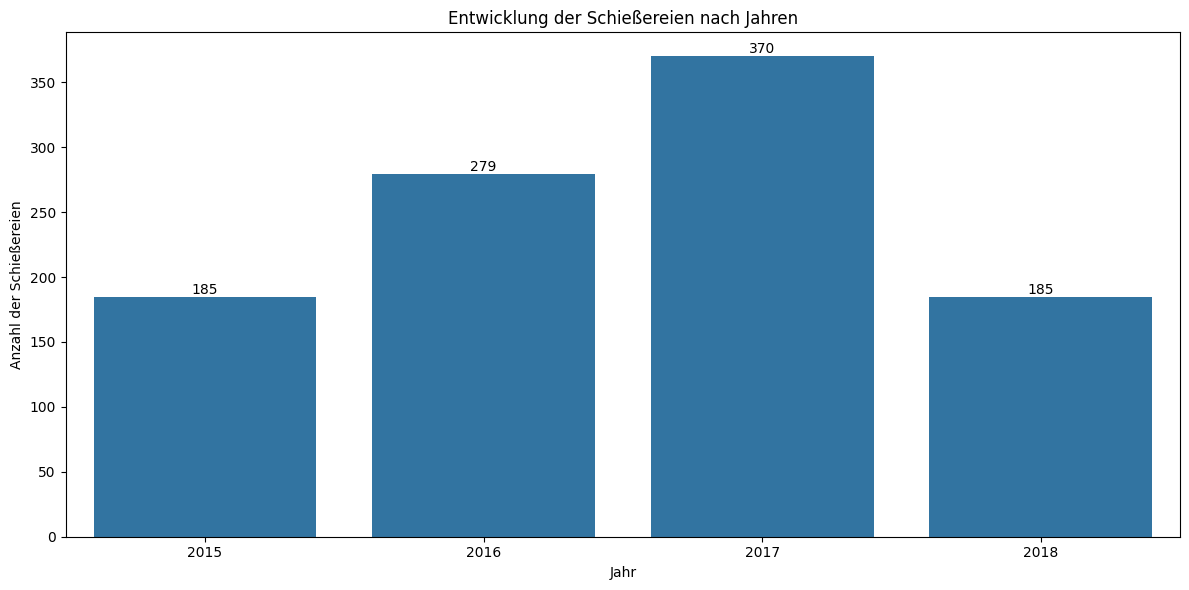


5. Entwicklung über die Jahre:
YEAR
2015    185
2016    279
2017    370
2018    185
dtype: int64

Jährliche Veränderung der Schießereien:
2016: +50.8%
2017: +32.6%
2018: -50.0%


In [62]:

# filter shootings
shootings = df[df['SHOOTING'] == 'Y']

# 1. analyze shootings by year
plt.figure(figsize=(12, 6))
yearly_shootings = shootings.groupby('YEAR').size()
ax = sns.barplot(x=yearly_shootings.index, y=yearly_shootings.values)

plt.title('Entwicklung der Schießereien nach Jahren')
plt.xlabel('Jahr')
plt.ylabel('Anzahl der Schießereien')

# add number labels
for i, v in enumerate(yearly_shootings):
    ax.text(i, v, str(v), ha='center', va='bottom')

plt.tight_layout()
plt.show()

print("\n5. Entwicklung über die Jahre:")
print(yearly_shootings)

# calculate yearly change
yearly_change = yearly_shootings.pct_change() * 100
print("\nJährliche Veränderung der Schießereien:")
for year, change in yearly_change.items():
    if not pd.isna(change):
        print(f"{year}: {change:+.1f}%")



#### 5.1 In welchem Bezirk finden die meisten Schießereien statt?

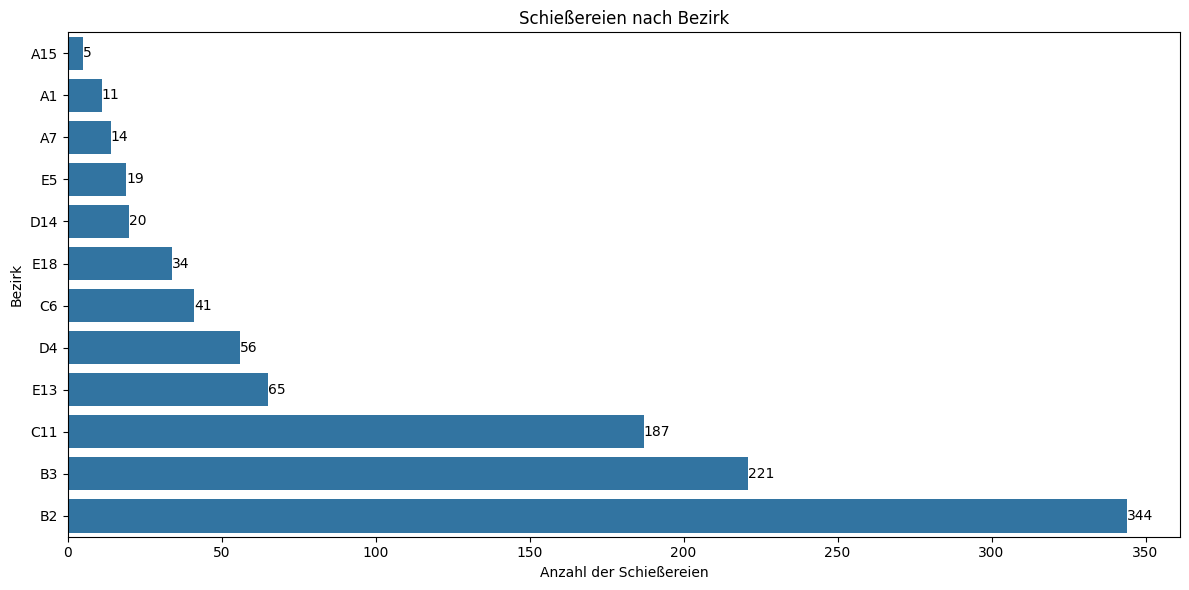


5.1. Top 5 Bezirke mit den meisten Schießereien:
DISTRICT
D4      56
E13     65
C11    187
B3     221
B2     344
dtype: int64


In [61]:

# 5.1 analyze shootings by district
plt.figure(figsize=(12, 6))
district_shootings = shootings.groupby('DISTRICT').size().sort_values(ascending=True)
ax = sns.barplot(x=district_shootings.values, y=district_shootings.index)

plt.title('Schießereien nach Bezirk')
plt.xlabel('Anzahl der Schießereien')
plt.ylabel('Bezirk')

# add number labels
for i, v in enumerate(district_shootings):
    ax.text(v, i, str(v), va='center')

plt.tight_layout()
plt.show()

print("\n5.1. Top 5 Bezirke mit den meisten Schießereien:")
print(district_shootings.tail(5))


#### 5.2 In welcher Straße finden die meisten Schießereien statt?

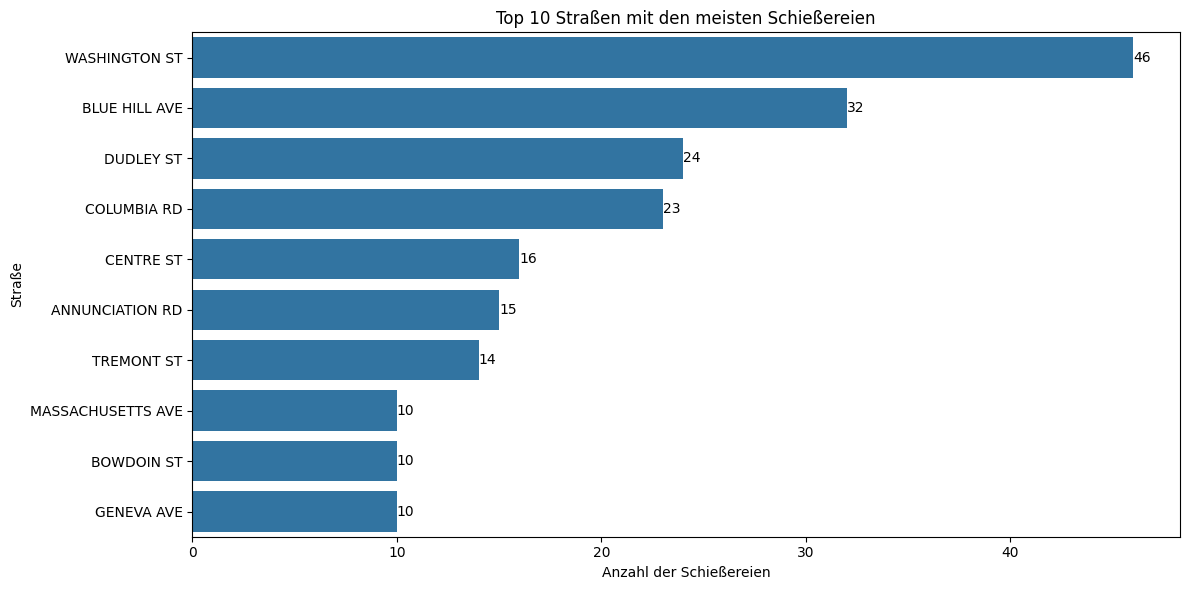


5.2 Top 5 Straßen mit den meisten Schießereien:
STREET
WASHINGTON ST    46
BLUE HILL AVE    32
DUDLEY ST        24
COLUMBIA RD      23
CENTRE ST        16
dtype: int64


In [63]:

# 3. analyze shootings by street
plt.figure(figsize=(12, 6))
street_shootings = shootings.groupby('STREET').size().sort_values(ascending=False)
top_10_streets = street_shootings.head(10)
ax = sns.barplot(x=top_10_streets.values, y=top_10_streets.index)

plt.title('Top 10 Straßen mit den meisten Schießereien')
plt.xlabel('Anzahl der Schießereien')
plt.ylabel('Straße')

# add number labels
for i, v in enumerate(top_10_streets):
    ax.text(v, i, str(v), va='center')

plt.tight_layout()
plt.show()

print("\n5.2 Top 5 Straßen mit den meisten Schießereien:")
print(top_10_streets.head())

#### 5.3 Zu welchen Uhrzeiten finden die meisten Schießereien statt?

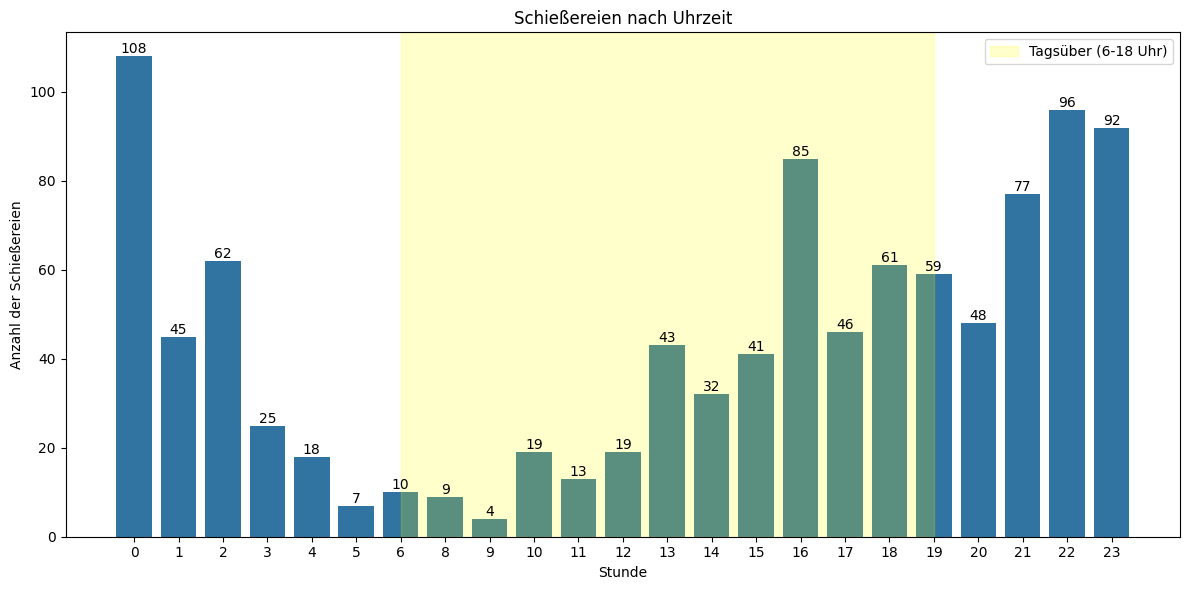


Zusammenfassung der Schießerei-Analyse:

1. Entwicklung über die Jahre:
YEAR
2015    185
2016    279
2017    370
2018    185
dtype: int64

2. Top 5 Bezirke mit den meisten Schießereien:
DISTRICT
D4      56
E13     65
C11    187
B3     221
B2     344
dtype: int64

3. Top 5 Straßen mit den meisten Schießereien:
STREET
WASHINGTON ST    46
BLUE HILL AVE    32
DUDLEY ST        24
COLUMBIA RD      23
CENTRE ST        16
dtype: int64

4. Zeitliche Verteilung:
Nacht (22-6): 453 Vorfälle (44.5%)
Morgen (6-12): 55 Vorfälle (5.4%)
Nachmittag (12-18): 266 Vorfälle (26.1%)
Abend (18-22): 245 Vorfälle (24.0%)

Gefährlichste Uhrzeiten:
0:00 Uhr: 108 Schießereien
22:00 Uhr: 96 Schießereien
23:00 Uhr: 92 Schießereien


In [57]:

# 5.3 analyze shootings by hours
plt.figure(figsize=(12, 6))
hourly_shootings = shootings.groupby('HOUR').size()
ax = sns.barplot(x=hourly_shootings.index, y=hourly_shootings.values)

plt.title('Schießereien nach Uhrzeit')
plt.xlabel('Stunde')
plt.ylabel('Anzahl der Schießereien')

# add number labels
for i, v in enumerate(hourly_shootings):
    ax.text(i, v, str(v), ha='center', va='bottom')

# add daytime/nighttime background
plt.axvspan(6, 18, alpha=0.2, color='yellow', label='Tagsüber (6-18 Uhr)')
plt.legend()

plt.tight_layout()
plt.show()

# output key results
print("\nZusammenfassung der Schießerei-Analyse:")

print("\n1. Entwicklung über die Jahre:")
print(yearly_shootings)

print("\n2. Top 5 Bezirke mit den meisten Schießereien:")
print(district_shootings.tail(5))

print("\n3. Top 5 Straßen mit den meisten Schießereien:")
print(top_10_streets.head())

print("\n4. Zeitliche Verteilung:")
# timeslots zu definieren
time_periods = {
    'Nacht (22-6)': shootings[(shootings['HOUR'] >= 22) | (shootings['HOUR'] < 6)].shape[0],
    'Morgen (6-12)': shootings[(shootings['HOUR'] >= 6) & (shootings['HOUR'] < 12)].shape[0],
    'Nachmittag (12-18)': shootings[(shootings['HOUR'] >= 12) & (shootings['HOUR'] < 18)].shape[0],
    'Abend (18-22)': shootings[(shootings['HOUR'] >= 18) & (shootings['HOUR'] < 22)].shape[0]
}

for period, count in time_periods.items():
    percentage = (count / len(shootings)) * 100
    print(f"{period}: {count} Vorfälle ({percentage:.1f}%)")

# high risk hours
peak_hours = hourly_shootings.nlargest(3)
print("\nGefährlichste Uhrzeiten:")
for hour, count in peak_hours.items():
    print(f"{hour}:00 Uhr: {count} Schießereien")